In [1]:
import csv

In [2]:
import pandas as pd

In [3]:
!ls ..

cls_magret		    optimization.pyc		 run_create_data.sh
create_pretraining_data.py  optimization_test.py	 run_mlm.sh
extract_features.py	    prepare_pretraining_data.py  run_prepare_data.sh
__init__.py		    py35			 run_pretraining.py
modeling.py		    py37			 split_magret
modeling.pyc		    __pycache__			 tokenization.py
modeling_test.py	    README.md			 tokenization.pyc
notebook		    requirements-3_5.txt	 tokenization_test.py
optimization.py		    requirements-3_7.txt	 utils


In [4]:
results_df = pd.read_csv('../cls_magret/pretraining_output/eval_results_masked_lm.txt')
results_df.head(10)

,masked_lm_predictions,label_ids,masked_lm_positions,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,292,292,9,2,6,100,292,292,292,292,...,0,0,0,0,0,0,0,0,0,0
1,368,368,4,2,368,44,53,368,368,439,...,0,0,0,0,0,0,0,0,0,0
2,29,29,20,2,29,223,53,514,21,53,...,0,0,0,0,0,0,0,0,0,0
3,71,71,11,2,71,115,71,401,458,71,...,0,0,0,0,0,0,0,0,0,0
4,166,670,1,2,4,43,43,53,81,292,...,0,0,0,0,0,0,0,0,0,0
5,166,315,1,2,315,53,43,1110,316,81,...,0,0,0,0,0,0,0,0,0,0
6,514,517,16,2,514,514,390,390,292,292,...,0,0,0,0,0,0,0,0,0,0
7,642,29,12,2,53,20,20,53,1110,27,...,0,0,0,0,0,0,0,0,0,0
8,71,71,5,2,71,120,71,286,461,285,...,0,0,0,0,0,0,0,0,0,0
9,53,53,6,2,29,223,53,360,20,4,...,0,0,0,0,0,0,0,0,0,0


In [5]:
vocab_df = pd.read_csv('../cls_magret/vocab-code.txt', header=None)
vocab_df.head(10)

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
5,[cls]
6,unaryop
7,raise
8,call
9,name


In [6]:
vocab_df2 = pd.read_csv('../../bert-cmp/bert/vocab-code.txt', header=None)
vocab_df2.head(10)

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
5,if
6,unaryop
7,not
8,call
9,name


In [7]:
set(vocab_df[0]) - set(vocab_df2[0])

{'[cls]',
 'aggregate',
 'atrousconv1d',
 'atrousconv2d',
 'averages',
 'avgpool1d',
 'avgpool2d',
 'avgpool3d',
 'big',
 'bottom',
 'brightness',
 'categorical',
 'color',
 'computed',
 'concatenated',
 'convlstm2d',
 'convolution1d',
 'convolution2d',
 'convolution2dtranspose',
 'convolution3d',
 'copyfrom',
 'cval',
 'cw',
 'daemon',
 'deconv3d',
 'deconvolution2d',
 'deconvolution3d',
 'doc',
 'dummy',
 'event',
 'existing',
 'fm',
 'follow',
 'ge',
 'globalavgpool1d',
 'globalavgpool2d',
 'globalavgpool3d',
 'globalmaxpool1d',
 'globalmaxpool2d',
 'globalmaxpool3d',
 'hexdigest',
 'horizontal',
 'keras1',
 'lengths',
 'links',
 'maxpool1d',
 'maxpool2d',
 'maxpool3d',
 'modes',
 'nd',
 'need',
 'np',
 'options',
 'ordereddict',
 'pickle',
 'plus',
 'preprocessing',
 'prog',
 'q',
 'ref',
 'relevant',
 'rescale',
 'right',
 'score',
 'separableconvolution1d',
 'separableconvolution2d',
 'shear',
 'since',
 'sources',
 'space',
 'splitext',
 'suffix',
 'tag',
 'too',
 'vertical',
 '

In [8]:
len(vocab_df)

1123

In [9]:
accuracy = 0

In [10]:
per_token_acc = {}; per_token_count = {}

In [11]:
for i in range(len(results_df)):
    snippet = [results_df[str(_)][i] for _ in range(64)]
    msk_idx = results_df.iloc[i]['masked_lm_positions']
    masked_tk = snippet[msk_idx]
    prediction = vocab_df.loc[results_df.iloc[i]['masked_lm_predictions']][0]
    label = vocab_df.loc[results_df.iloc[i]['label_ids']][0]
    if per_token_acc.get(label, None) == None:
        per_token_acc[label] = 0
        per_token_count[label] = 0
    per_token_acc[label] += int(prediction == label)
    per_token_count[label] += 1
    accuracy += int(prediction == label)
    #print("Predicted --", prediction)
    #print("Label     --", label)
    #print()

In [12]:
total_per_token_accuracy = {}
per_token_freq = {}
for k,v in per_token_acc.items():
    if per_token_count[k] > 0:
        total_per_token_accuracy[k] = v / per_token_count[k]
        per_token_freq[k] = per_token_count[k] / len(results_df)

In [13]:
import matplotlib.pyplot as plt

In [14]:
from collections import Counter
import numpy as np

In [15]:
c = Counter(total_per_token_accuracy)
c.most_common(100)

[('pooling', 1.0),
 ('greater', 1.0),
 ('fill', 1.0),
 ('uint8', 1.0),
 ('kwonlyargs', 1.0),
 ('frombuffer', 1.0),
 ('cast', 1.0),
 ('stddev', 1.0),
 ('masking', 1.0),
 ('init', 1.0),
 ('vals', 1.0),
 ('rows', 1.0),
 ('arrays', 1.0),
 ('supports', 1.0),
 ('square', 1.0),
 ('b', 1.0),
 ('argmax', 1.0),
 ('convolution', 1.0),
 ('async', 1.0),
 ('preprocess', 1.0),
 ('cols', 1.0),
 ('usub', 0.9888888888888889),
 ('items', 0.9861111111111112),
 ('inf', 0.9841269841269841),
 ('subscript', 0.9785655399835119),
 ('arguments', 0.9735449735449735),
 ('go', 0.9629629629629629),
 ('index', 0.9613970588235294),
 ('serialize', 0.953125),
 ('dilation', 0.95),
 ('parameter', 0.9444444444444444),
 ('constants', 0.9395604395604396),
 ('sub', 0.9342105263157895),
 ('unaryop', 0.9289340101522843),
 ('bias', 0.9285714285714286),
 ('backwards', 0.925),
 ('starred', 0.925),
 ('constraint', 0.9245283018867925),
 ('variables', 0.9230769230769231),
 ('regularizer', 0.9225352112676056),
 ('nnet', 0.916666666666

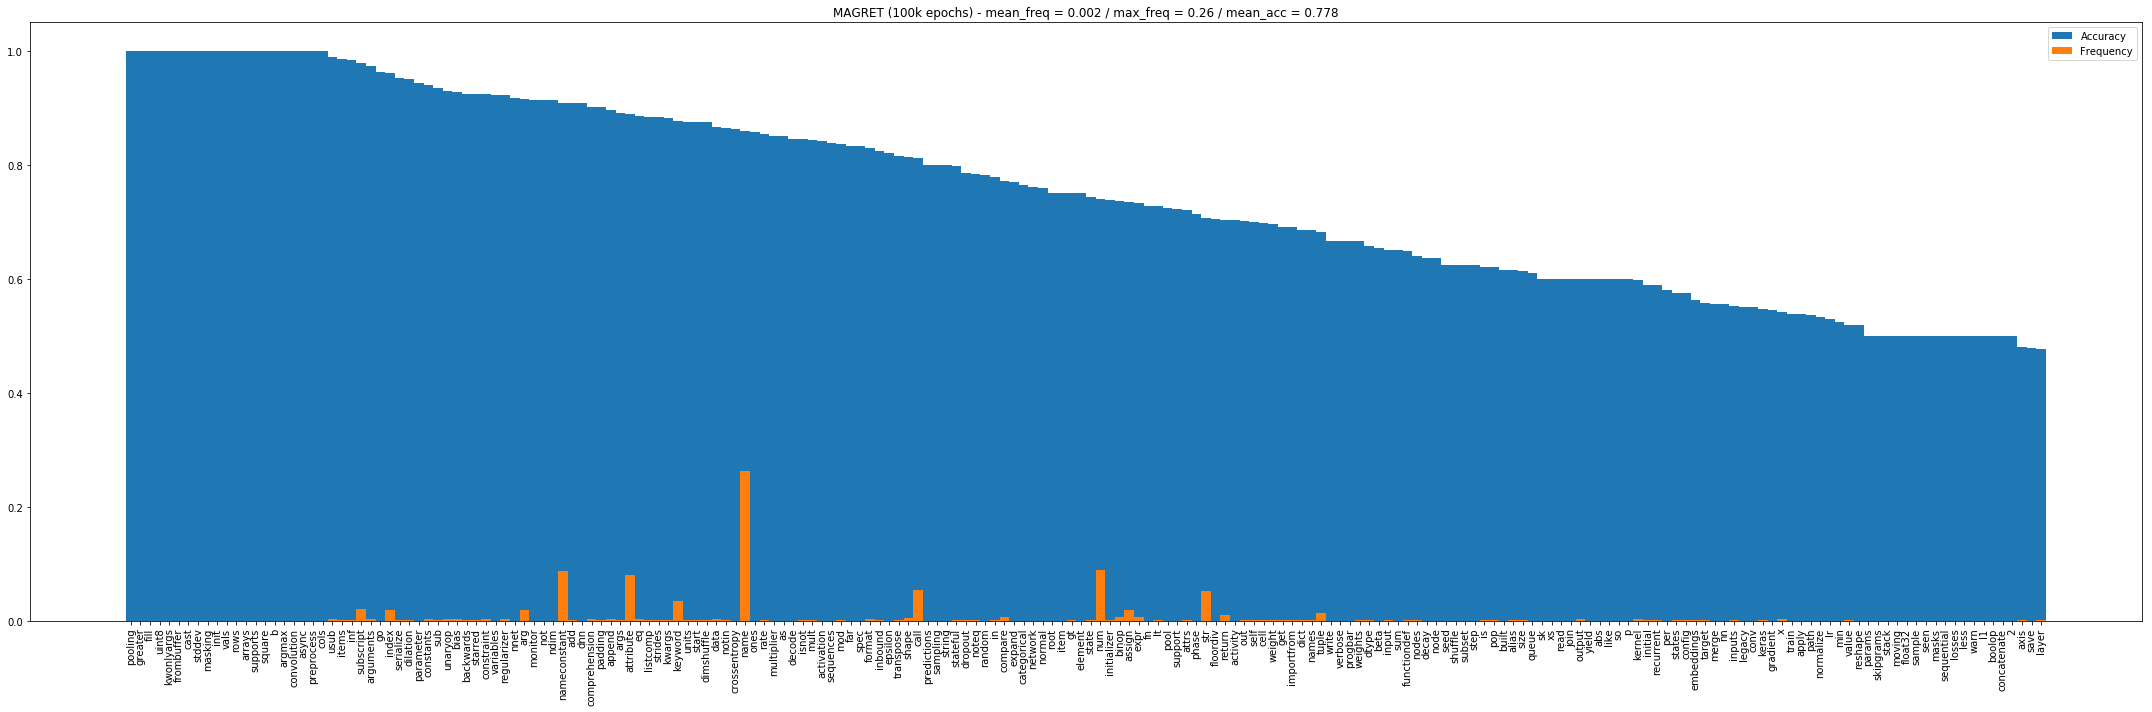

In [24]:
plt.figure(figsize=(30,10))
labels, values = zip(*c.most_common(200))

indexes = np.arange(len(labels))
width = 1

freqs = [per_token_freq[l] for l in labels]

mean_freq = np.mean(list(per_token_freq.values()))
mean_acc = (accuracy / len(results_df))

plt.bar(indexes, values, width, label='Accuracy')
plt.bar(indexes, freqs, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (100k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
plt.savefig('MAGRET-100k_epochs_top200.png')
plt.show()

In [17]:
pred = list(results_df.loc[10][3:])
pred

[2,
 1110,
 1019,
 32,
 834,
 613,
 53,
 53,
 53,
 53,
 53,
 400,
 29,
 1110,
 1011,
 29,
 29,
 1110,
 1011,
 29,
 29,
 1110,
 1011,
 29,
 29,
 1110,
 1011,
 29,
 29,
 1110,
 1011,
 29,
 29,
 4,
 1019,
 1110,
 1020,
 1110,
 1021,
 29,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [18]:
pred_str = [vocab_df.loc[i][0] for i in pred]

In [19]:
pred_str

['[CLS]',
 'attribute',
 'dnn',
 'batch',
 'normalization',
 'test',
 'call',
 'call',
 'call',
 'call',
 'call',
 'str',
 'name',
 'attribute',
 'dimshuffle',
 'name',
 'name',
 'attribute',
 'dimshuffle',
 'name',
 'name',
 'attribute',
 'dimshuffle',
 'name',
 'name',
 'attribute',
 'dimshuffle',
 'name',
 'name',
 'attribute',
 'dimshuffle',
 'name',
 'name',
 '[MASK]',
 'dnn',
 'attribute',
 'cuda',
 'attribute',
 'sandbox',
 'name',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]',
 '[PAD]']

In [20]:
d = Counter(per_token_freq)
d.most_common(100)

[('name', 0.2627072758037225),
 ('num', 0.08957698815566836),
 ('nameconstant', 0.0865989847715736),
 ('attribute', 0.08030456852791878),
 ('call', 0.05397631133671743),
 ('str', 0.05291032148900169),
 ('keyword', 0.03460236886632826),
 ('subscript', 0.020524534686971234),
 ('assign', 0.018747884940778343),
 ('index', 0.01840947546531303),
 ('arg', 0.018274111675126905),
 ('tuple', 0.01377326565143824),
 ('return', 0.00949238578680203),
 ('expr', 0.007461928934010153),
 ('binop', 0.006632825719120135),
 ('compare', 0.006159052453468697),
 ('shape', 0.005566835871404399),
 ('list', 0.005499153976311337),
 ('if', 0.00532994923857868),
 ('unaryop', 0.0033333333333333335),
 ('arguments', 0.003197969543147208),
 ('constants', 0.0030795262267343487),
 ('bias', 0.0030795262267343487),
 ('output', 0.003045685279187817),
 ('usub', 0.003045685279187817),
 ('data', 0.0029272419627749575),
 ('x', 0.002774957698815567),
 ('comprehension', 0.0027580372250423013),
 ('constraint', 0.002690355329949238

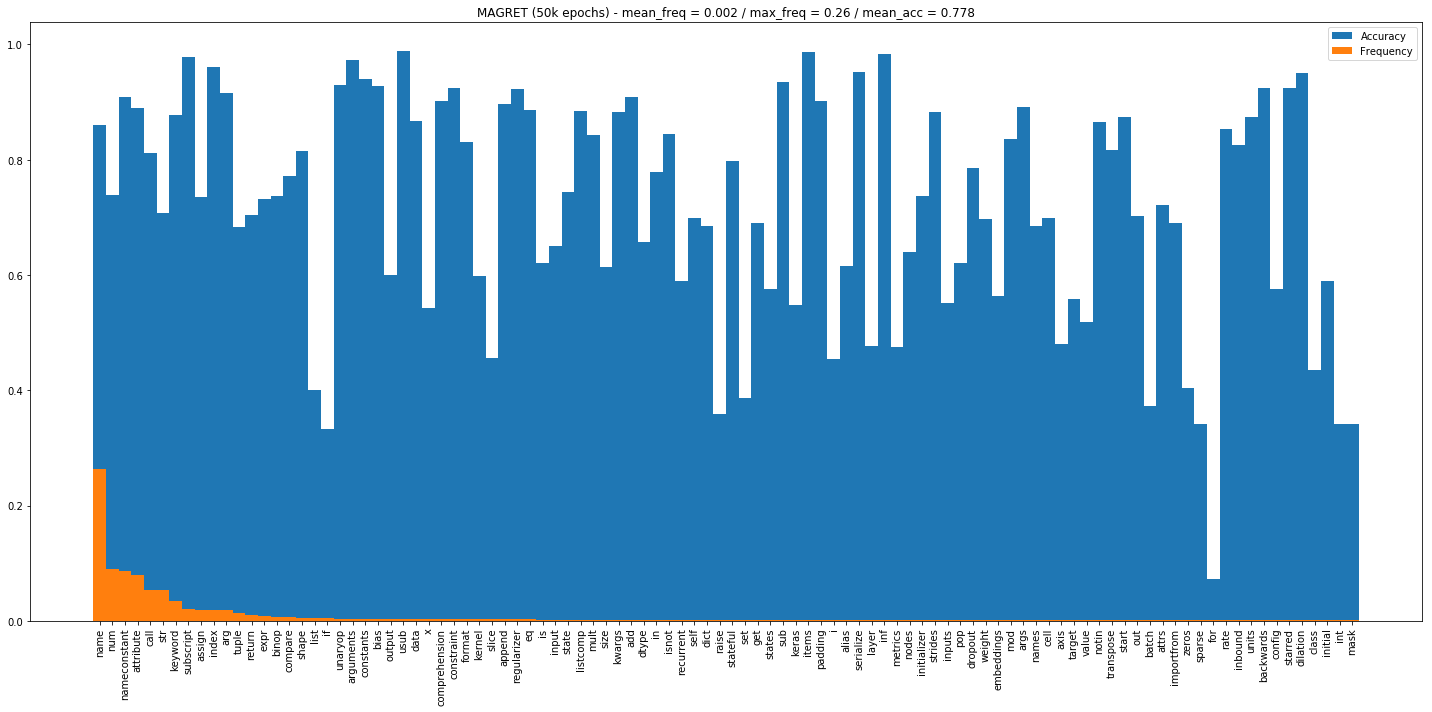

In [21]:
plt.figure(figsize=(20,10))
labels, values = zip(*d.most_common(100))

indexes = np.arange(len(labels))
width = 1

accuracies = [c[tok] for tok in labels]

plt.bar(indexes, accuracies, width, label='Accuracy')
plt.bar(indexes, values, width, label='Frequency')
plt.xticks(indexes , labels, rotation=90)
plt.title('MAGRET (50k epochs) - mean_freq = {:.3f} / max_freq = {:.2f} / mean_acc = {:.3f}'.format(mean_freq, np.max(freqs), mean_acc))
plt.legend()
plt.tight_layout()
#plt.savefig('BERT-struct-90k_epochs_top20.png')
plt.show()